In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [ ]:
data = pd.read_csv('loan.csv')
data

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.560,595.00,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.250,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.000,0.00,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,type1,p3,nob/c,436500,3.125,9960.00,608000.0,pr,7860.0,CIB,659,EXP,55-64,71.792763,south,0
148666,173556,2019,cf,Male,type1,p1,nob/c,586500,5.190,0.00,788000.0,ir,7140.0,CIB,569,CIB,25-34,74.428934,south,0
148667,173557,2019,cf,Male,type1,p4,nob/c,446500,3.125,1226.64,728000.0,pr,6900.0,CIB,702,EXP,45-54,61.332418,North,0
148668,173558,2019,cf,Female,type1,p4,nob/c,196500,3.500,4323.33,278000.0,pr,7140.0,EXP,737,EXP,55-64,70.683453,North,0


In [ ]:
# Check data types
data_types = data.dtypes
print("\nData Types:\n", data_types)


Data Types:
 ID                            int64
year                          int64
loan_limit                   object
Gender                       object
loan_type                    object
loan_purpose                 object
business_or_commercial       object
loan_amount                   int64
rate_of_interest            float64
Upfront_charges             float64
property_value              float64
occupancy_type               object
income                      float64
credit_type                  object
Credit_Score                  int64
co-applicant_credit_type     object
age                          object
LTV                         float64
Region                       object
Status                        int64
dtype: object


In [ ]:
# Descriptive statistics
data.describe()

,ID,year,loan_amount,rate_of_interest,Upfront_charges,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.0,1.486700e+05,112231.000000,109028.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,3224.996127,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,0.0,1.839093e+05,0.561391,3251.121510,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,24890.000000,2019.0,1.650000e+04,0.000000,0.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,581.490000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,2596.450000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,4812.500000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,60000.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


In [ ]:
#Check statistical values for fields with other than numerical datatype
data.describe(exclude=np.number).T

,count,unique,top,freq
loan_limit,145326,2,cf,135348
Gender,148670,4,Male,42346
loan_type,148670,3,type1,113173
loan_purpose,148536,4,p3,55934
business_or_commercial,148670,2,nob/c,127908
occupancy_type,148670,3,pr,138201
credit_type,148670,4,CIB,48152
co-applicant_credit_type,148670,2,CIB,74392
age,148470,7,45-54,34720
Region,148670,4,North,74722


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 loan_limit           3344
loan_purpose          134
rate_of_interest    36439
Upfront_charges     39642
property_value      15098
income               9150
age                   200
LTV                 15098
dtype: int64


## Analyse all the columns

In [ ]:
# Check data types
data_types = data.dtypes
print("\nData Types:\n", data_types)


Data Types:
 ID                            int64
year                          int64
loan_limit                   object
Gender                       object
loan_type                    object
loan_purpose                 object
business_or_commercial       object
loan_amount                   int64
rate_of_interest            float64
Upfront_charges             float64
property_value              float64
occupancy_type               object
income                      float64
credit_type                  object
Credit_Score                  int64
co-applicant_credit_type     object
age                          object
LTV                         float64
Region                       object
Status                        int64
dtype: object


In [ ]:
# Analyse ID
ID_values = data['ID'].value_counts()
ID_values[ID_values>1].count()

0

In [ ]:
# Analyse year
data['year'].value_counts()

2019    148670
Name: year, dtype: int64

Observation:  
The data has only information about loans taken in year 2019.

In [ ]:
# Analyse loan_limit
data['loan_limit'].value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [ ]:
# Analyse Gender
data['Gender'].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

In [ ]:
# Analyse business_or_commercial
data['business_or_commercial'].value_counts()

nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64

In [ ]:
# Analyse loan_type
data['loan_type'].value_counts()

type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64

In [ ]:
# Analyse loan_purpose
data['loan_purpose'].value_counts()

p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64

In [ ]:
# Analyse rate_of_interest
data['rate_of_interest'].describe()

count    112231.000000
mean          4.045476
std           0.561391
min           0.000000
25%           3.625000
50%           3.990000
75%           4.375000
max           8.000000
Name: rate_of_interest, dtype: float64

In [ ]:
# Analyse Upfront_charges
data['Upfront_charges'].describe()

count    109028.000000
mean       3224.996127
std        3251.121510
min           0.000000
25%         581.490000
50%        2596.450000
75%        4812.500000
max       60000.000000
Name: Upfront_charges, dtype: float64

In [ ]:
# Analyse property_value
data['property_value'].describe()

count    1.335720e+05
mean     4.978935e+05
std      3.599353e+05
min      8.000000e+03
25%      2.680000e+05
50%      4.180000e+05
75%      6.280000e+05
max      1.650800e+07
Name: property_value, dtype: float64

In [ ]:
# Analyse occupancy_type
data['occupancy_type'].value_counts()

pr    138201
ir      7340
sr      3129
Name: occupancy_type, dtype: int64

In [ ]:
# Analyse income
data['income'].describe()

count    139520.000000
mean       6957.338876
std        6496.586382
min           0.000000
25%        3720.000000
50%        5760.000000
75%        8520.000000
max      578580.000000
Name: income, dtype: float64

In [ ]:
# Analyse credit_type
data['credit_type'].value_counts()

CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: credit_type, dtype: int64

In [ ]:
# Analyse Credit_Score
data['Credit_Score'].describe()

count    148670.000000
mean        699.789103
std         115.875857
min         500.000000
25%         599.000000
50%         699.000000
75%         800.000000
max         900.000000
Name: Credit_Score, dtype: float64

In [ ]:
# Analyse co-applicant_credit_type
data['co-applicant_credit_type'].value_counts()

CIB    74392
EXP    74278
Name: co-applicant_credit_type, dtype: int64

In [ ]:
# Analyse age
data['age'].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [ ]:
# Analyse LTV
data['LTV'].describe()

count    133572.000000
mean         72.746457
std          39.967603
min           0.967478
25%          60.474860
50%          75.135870
75%          86.184211
max        7831.250000
Name: LTV, dtype: float64

In [ ]:
# Analyse Region
data['Region'].value_counts()

North         74722
south         64016
central        8697
North-East     1235
Name: Region, dtype: int64

In [ ]:
# Analyse Status
data['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [ ]:
# Handle Outliers and null values

def get_group_min_max(df, groupby, column):
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0], y[0]

def fix_inconsistent_values(df, groupby, column):
    print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')

    ming, maxg = get_group_min_max(df, groupby, column)
    print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{ming},\nmax:\t{ maxg}', sep='\n', end='\n')

    #Get the global Min amd max for the column
    df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
    x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
    mini, maxi = x[0], y[0]

    # assign Wrong Values to NaN
    col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

    # fill with local mean
    mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    df[column] = col.fillna(mode_by_group)
    df[column].fillna(df[column].mean(),inplace=True)

    print("\nAfter Cleaning Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
    print("\nNo. of Unique values after Cleaning:",df[column].nunique())
    print("\nNo. of Null values after Cleaning:",df[column].isnull().sum())

def handle_outliers_IQR(df, column):
  # Calculate Q1, Q2, Q3
  Q1 = df[column].quantile(0.25)
  Q2 = df[column].quantile(0.50)
  Q3 = df[column].quantile(0.75)

  # Calculate the IQR
  IQR = Q3 - Q1

  # Calculate the lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Replace outliers with the bounds
  df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
  print("\nAfter Cleaning Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
  print("\nNo. of Unique values after Cleaning:",df[column].nunique())

def fix_null_values(df, groupby, column):

    # Calculate the mean of each group in the specified column
    group_means = df.groupby(groupby)[column].mean()

    # Create a new column to store the mean of each group for the specified column
    mean_by_group = df[groupby].map(group_means)

    # Replace null values in the original column with the mean values of their respective groups
    df[column].fillna(mean_by_group, inplace=True)

    print("\nNo. of Null values after Cleaning:",df[column].isnull().sum())


In [ ]:
#Method to clean Numerical Field
def clean_numerical_field(df,groupby,column,datatype=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")
    # Change datatype
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    fix_null_values(df, groupby, column)


In [ ]:
def plot_displot(df,column,hue,rotation=0,bins=20):
    print("\n-----------------------------------------------------")
    print(f'\n{column} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.displot(data=df, x=column,hue=hue, kde=True, bins=bins)

    plt.xlabel(f'{column}')
    plt.ylabel('Number of Records')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

def plot_countplot(df,column,hue,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{column} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.countplot(data=df, x=column, hue=hue)

    plt.xlabel(f'{column}')
    plt.ylabel('Number of Records')
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [ ]:
# Function to print basic useful details for a given column
def get_column_details(df,column):
    print("Details of",column,"column")

    #DataType of column
    print("\nDataType: ",df[column].dtype)

    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())

    #Get Distribution of Column
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

def test_hypothysis(column):
  # Create a contingency table
  crosstab = pd.crosstab(data[column], data['Status'])

  # Perform a chi-square test
  chi2, p, dof, expected = stats.chi2_contingency(crosstab)

  # Print the results
  print('Chi-square statistic:', chi2)
  print('P-value:', p)

  # Interpret the results
  if p < 0.05:
      print(f'There is a relation between {column} and default rate')
  else:
    print(f"There is No relation between {column} and default rate")

def test_hypothysis_ttest(column):
  # Group the data by status
  grouped_data = data.groupby('Status')

  # Calculate the mean for each status
  mean = grouped_data[column].mean()
  print(f"mean of {column} values: \n{mean} for each status")


  # Perform Ttest test
  t_statistic, p_value = stats.ttest_ind(grouped_data.get_group(1)[column],grouped_data.get_group(0)[column])

  # Print the results
  print('T-statistic:', t_statistic)
  print('p-value:', p_value)

 # Interpret the results
  if p_value < 0.05:
      print(f'There is a relation between {column} and default rate')
  else:
    print(f"There is No relation between {column} and default rate")


-----------------------------------------------------

Status Distribution


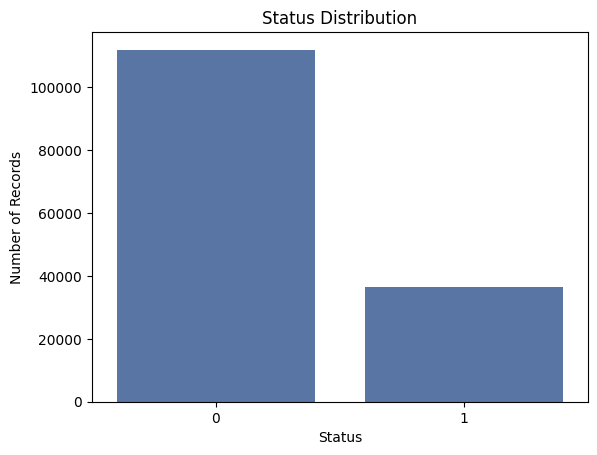

In [ ]:
plot_countplot(data,'Status',None)

In [ ]:
total_datapoints = len(data)
num_status_1 = len(data[data['Status'] == 1])
num_status_0 = len(data[data['Status'] == 0])

percent_status_1 = (num_status_1 / total_datapoints) * 100
percent_status_0 = (num_status_0 / total_datapoints) * 100

print(f"Percentage of status 1, Status 0: {percent_status_1:.2f}%, {percent_status_0:.2f}%")


Percentage of status 1, Status 0: 24.55%, 75.45%


Details of loan_limit column

DataType:  object

There are no null values

Number of Unique Values:  2

Distribution of column:

cf     138692
ncf      9978
Name: loan_limit, dtype: int64

-----------------------------------------------------

loan_limit Distribution


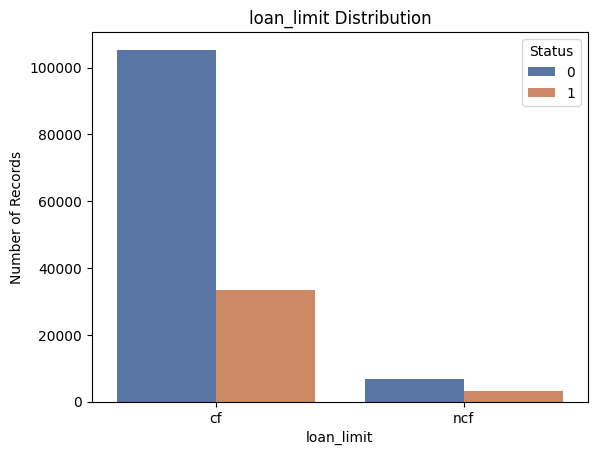

In [ ]:
# Analysis of loan_amount
data['loan_limit'].fillna(data['loan_limit'].mode()[0], inplace=True)
get_column_details(data,'loan_limit')
# Plot the data
plot_countplot(data,'loan_limit', 'Status')

In [ ]:
loan_limit_status_1_pct = (
    data[data['Status'] == 1]
    .groupby('loan_limit')['loan_limit']
    .count()
    .div(data.groupby('loan_limit')['loan_limit'].count())
    .mul(100)
    .sort_values(ascending=False)
)
loan_limit_status_1_pct

loan_limit
ncf    33.213069
cf     24.028062
Name: loan_limit, dtype: float64

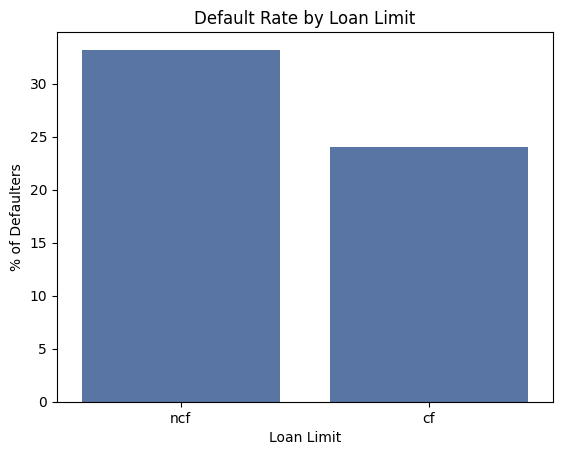

In [ ]:
sns.barplot(x=loan_limit_status_1_pct.index, y=loan_limit_status_1_pct)
plt.xlabel('Loan Limit')
plt.ylabel('% of Defaulters')
plt.title('Default Rate by Loan Limit')
plt.show()


In [ ]:
test_hypothysis('loan_limit')

Chi-square statistic: 422.3643530286387
P-value: 7.461399035455983e-94
There is a relation between loan_limit and default rate


### Observation:  

So Loans with no fixed limit has higher default rate

Details of loan_amount column

DataType:  int64

There are no null values

Number of Unique Values:  211

Distribution of column:

206500     4610
256500     4079
156500     3967
226500     3944
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: loan_amount, Length: 211, dtype: int64

After Cleaning Min, Max Values:
min     16500
max    796500
Name: loan_amount, dtype: int64

No. of Unique values after Cleaning: 79

-----------------------------------------------------

loan_amount Distribution


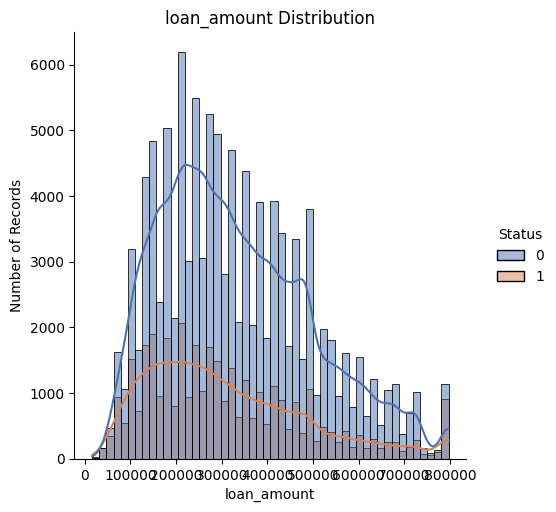

In [ ]:
# Analysis of loan_amount
get_column_details(data,'loan_amount')
# handle outliers using IQR method
handle_outliers_IQR(data, 'loan_amount')
#Plot Graph
plot_displot(data,'loan_amount','Status',bins=50)

In [ ]:
# hypothysis test
test_hypothysis_ttest('loan_amount')

mean of loan_amount values: 
Status
0    332836.103400
1    312060.741287
Name: loan_amount, dtype: float64 for each status
T-statistic: -20.46116688174276
p-value: 6.42142193412049e-93
There is a relation between loan_amount and default rate


### Observation:  

So loan ammount of default loans are slightly less than loan ammount of settled loan.
Probably that is good business decision to lend less to risky customer.

In [ ]:
# Analysis of rate_of_interest
get_column_details(data,'rate_of_interest')

Details of rate_of_interest column

DataType:  float64

There are  36439  null values

Number of Unique Values:  131

Distribution of column:

3.990    14455
3.625     8800
3.875     8592
3.750     8474
3.500     6866
         ...  
4.700        1
8.000        1
7.750        1
5.300        1
2.700        1
Name: rate_of_interest, Length: 131, dtype: int64



-----------------------------------------------------

Cleaning steps 

Datatype of rate_of_interest is changed to float

No. of Null values after Cleaning: 0

-----------------------------------------------------

rate_of_interest Distribution


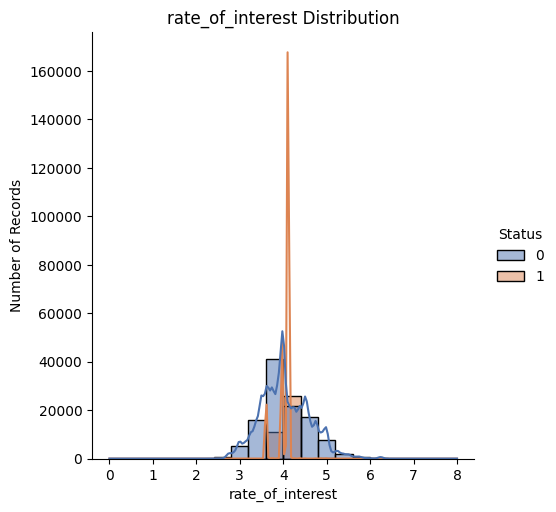

In [ ]:
column_name = 'rate_of_interest'
group_by = 'loan_type'
target_column = 'Status'
#Cleaning
clean_numerical_field(data,group_by,column_name,datatype='float')
#Plot Graph
plot_displot(data,column_name,target_column)

In [ ]:
# hypothysis test
test_hypothysis_ttest('rate_of_interest')

mean of rate_of_interest values: 
Status
0    4.044931
1    4.035631
Name: rate_of_interest, dtype: float64 for each status
T-statistic: -3.1295675709459823
p-value: 0.001750976557642259
There is a relation between rate_of_interest and default rate


### Observation:  

So  Loans lower interst rate has higher default rate. This might be because bad decision making to lend risky customers with lower interest rate.

In [ ]:
# Analysis of Upfront_charges
get_column_details(data,'Upfront_charges')

Details of Upfront_charges column

DataType:  float64

There are  39642  null values

Number of Unique Values:  58271

Distribution of column:

0.00       20770
1250.00     1184
1150.00      892
795.00       487
295.00       403
           ...  
4447.72        1
3173.84        1
3421.81        1
198.96         1
4323.33        1
Name: Upfront_charges, Length: 58271, dtype: int64



-----------------------------------------------------

Cleaning steps 

Datatype of Upfront_charges is changed to float

No. of Null values after Cleaning: 0

After Cleaning Min, Max Values:
min       0.0000
max    7848.7375
Name: Upfront_charges, dtype: float64

No. of Unique values after Cleaning: 51188

-----------------------------------------------------

Upfront_charges Distribution


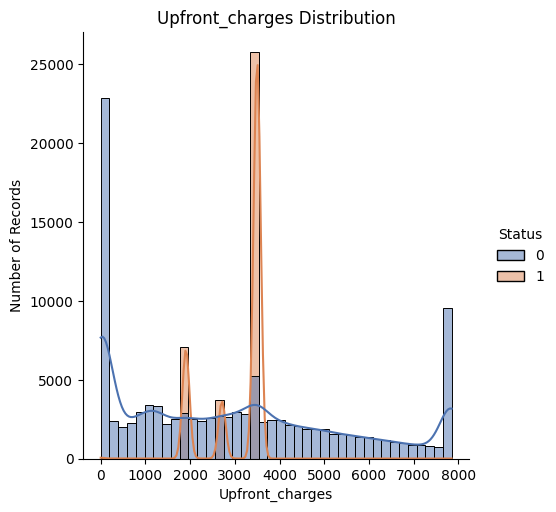

In [ ]:
column_name = 'Upfront_charges'
group_by = 'loan_type'
target_column = 'Status'

#Cleaning
clean_numerical_field(data,group_by,column_name,datatype='float')
handle_outliers_IQR(data, column_name)
#Plot Graph
plot_displot(data,column_name,target_column,bins=40)

In [ ]:
# hypothysis test
test_hypothysis_ttest('Upfront_charges')

mean of Upfront_charges values: 
Status
0    2986.465455
1    3103.741301
Name: Upfront_charges, dtype: float64 for each status
T-statistic: 8.777437464968642
p-value: 1.6896203694061087e-18
There is a relation between Upfront_charges and default rate


### Observation:  

So Loans with high Upfront charges has higher default rate

In [ ]:
# Analysis of property_value
get_column_details(data,'property_value')

Details of property_value column

DataType:  float64

There are  15098  null values

Number of Unique Values:  385

Distribution of column:

308000.0     2792
258000.0     2763
358000.0     2679
408000.0     2537
328000.0     2524
             ... 
4648000.0       1
3878000.0       1
5758000.0       1
2618000.0       1
2698000.0       1
Name: property_value, Length: 385, dtype: int64



-----------------------------------------------------

Cleaning steps 

Datatype of property_value is changed to float

No. of Null values after Cleaning: 0

After Cleaning Min, Max Values:
min       8000.0
max    1063000.0
Name: property_value, dtype: float64

No. of Unique values after Cleaning: 110

-----------------------------------------------------

property_value Distribution


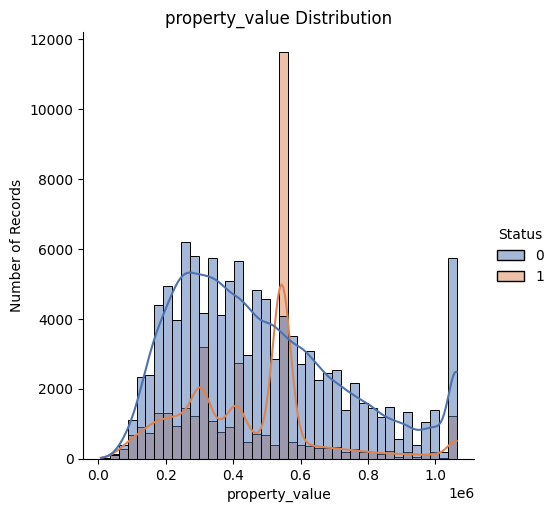

In [ ]:
column_name = 'property_value'
group_by = 'loan_type'
target_column = 'Status'

#Cleaning
clean_numerical_field(data,group_by,column_name,datatype='float')
handle_outliers_IQR(data, column_name)
#Plot Graph
plot_displot(data,column_name,target_column,bins=40)

In [ ]:
# hypothysis test
test_hypothysis_ttest('property_value')

mean of property_value values: 
Status
0    482526.222984
1    450338.807337
Name: property_value, dtype: float64 for each status
T-statistic: -22.011405550303802
p-value: 3.325846222915456e-107
There is a relation between property_value and default rate


### Observation:  

So Loans with lower property value has higher default rate

Details of Credit_Score column

DataType:  int64

There are no null values

Number of Unique Values:  401

Distribution of column:

763    415
867    413
639    411
581    408
554    407
      ... 
745    330
573    330
743    327
748    324
559    321
Name: Credit_Score, Length: 401, dtype: int64

-----------------------------------------------------

Credit_Score Distribution


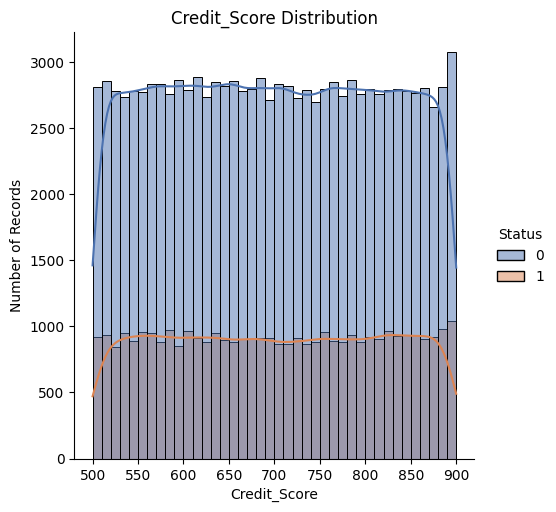

In [ ]:
# Analysis of Credit_Score
get_column_details(data,'Credit_Score')
#Plot Graph
plot_displot(data,'Credit_Score','Status',bins=40)

In [ ]:
# hypothysis test
test_hypothysis_ttest('Credit_Score')

mean of Credit_Score values: 
Status
0    699.523793
1    700.600344
Name: Credit_Score, dtype: float64 for each status
T-statistic: 1.5437361122829274
p-value: 0.12265440254169067
There is No relation between Credit_Score and default rate


### Observation:  

So credit score has no imoact on default rate

In [ ]:
# Analysis of LTV
get_column_details(data,'LTV')

Details of LTV column

DataType:  float64

There are  15098  null values

Number of Unique Values:  8484

Distribution of column:

81.250000    530
91.666667    499
80.038760    380
80.032468    328
94.956140    322
            ... 
33.598066      1
13.618746      1
55.981445      1
50.175070      1
32.802013      1
Name: LTV, Length: 8484, dtype: int64



-----------------------------------------------------

Cleaning steps 

Datatype of LTV is changed to float

No. of Null values after Cleaning: 0

After Cleaning Min, Max Values:
min     29.918993
max    118.929338
Name: LTV, dtype: float64

No. of Unique values after Cleaning: 6383

-----------------------------------------------------

LTV Distribution


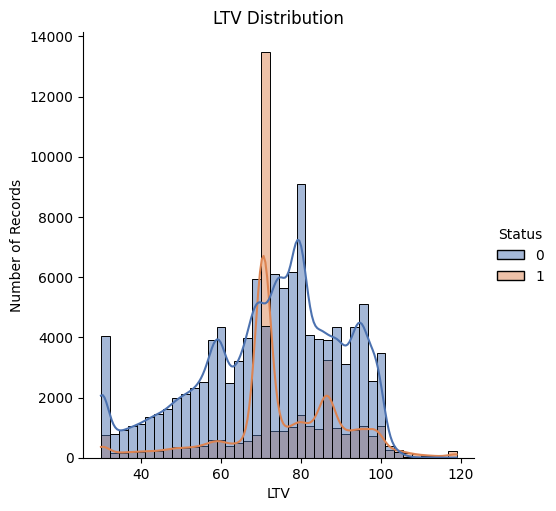

In [ ]:
column_name = 'LTV'
group_by = 'business_or_commercial'
target_column = 'Status'

#Cleaning
clean_numerical_field(data,group_by,column_name,datatype='float')
handle_outliers_IQR(data, column_name)
#Plot Graph
plot_displot(data,column_name,target_column,bins=40)

In [ ]:
# hypothysis test
test_hypothysis_ttest('LTV')

mean of LTV values: 
Status
0    72.079327
1    74.899935
Name: LTV, dtype: float64 for each status
T-statistic: 27.109547069189063
p-value: 1.883515588828528e-161
There is a relation between LTV and default rate


### Observation:  

So Loans with High LTV has higher default rate

Details of Gender column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64

-----------------------------------------------------

Gender Distribution


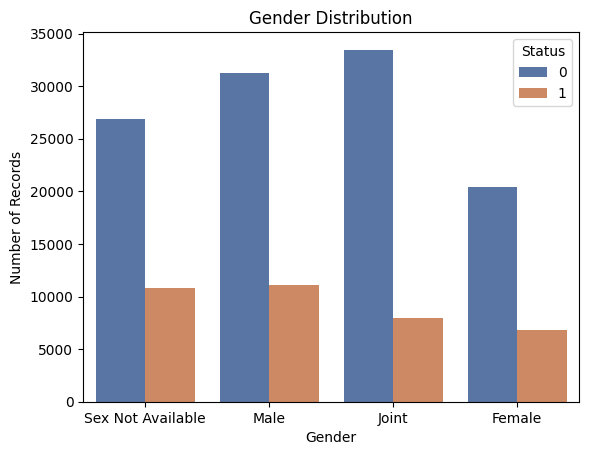

In [ ]:
# Analysis of Gender
column_name = 'Gender'
target_column = 'Status'
get_column_details(data,column_name)
#Plot Graph
plot_countplot(data,column_name,target_column)

In [ ]:
gender_status_1_pct = (
    data[data['Status'] == 1]
    .groupby('Gender')['Gender']
    .count()
    .div(data.groupby('Gender')['Gender'].count())
    .mul(100)
    .sort_values(ascending=False)
)
gender_status_1_pct

Gender
Sex Not Available    28.590775
Male                 26.191376
Female               25.115528
Joint                19.162299
Name: Gender, dtype: float64

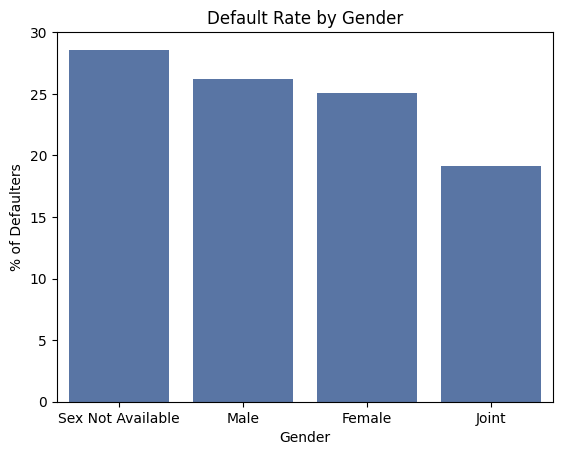

In [ ]:
sns.barplot(x=gender_status_1_pct.index, y=gender_status_1_pct)
plt.xlabel('Gender')
plt.ylabel('% of Defaulters')
plt.title('Default Rate by Gender')
plt.show()


In [ ]:
test_hypothysis('Gender')

Chi-square statistic: 1043.6008495787444
P-value: 6.260048330360408e-226
There is a relation between Gender and default rate


### Observation:  

So People who does not specify gendar has a higher tendency to default on loans. Whereas joint account holders are less likely to default.

Details of loan_type column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64

-----------------------------------------------------

loan_type Distribution


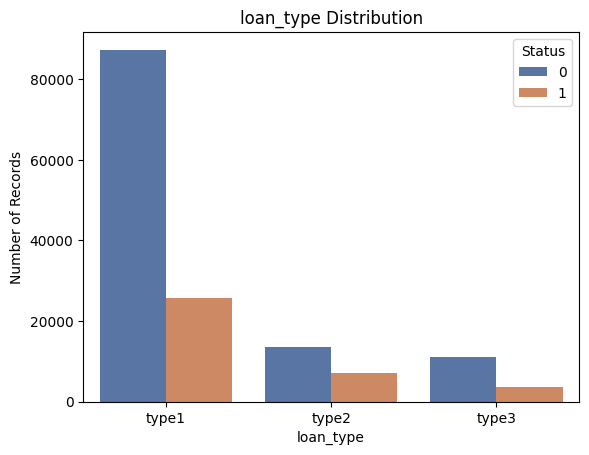

In [ ]:
# Analysis of loan_type
column_name = 'loan_type'
target_column = 'Status'
get_column_details(data,column_name)
#Plot Graph
plot_countplot(data,column_name,target_column)

In [ ]:
loan_type_status_1_pct = (
    data[data['Status'] == 1]
    .groupby('loan_type')['loan_type']
    .count()
    .div(data.groupby('loan_type')['loan_type'].count())
    .mul(100)
    .sort_values(ascending=False)
)
loan_type_status_1_pct

loan_type
type2    34.543878
type3    25.055989
type1    22.774867
Name: loan_type, dtype: float64

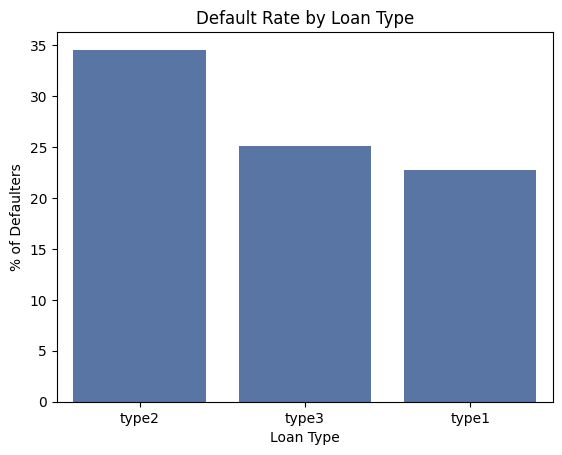

In [ ]:
sns.barplot(x=loan_type_status_1_pct.index, y=loan_type_status_1_pct)
plt.xlabel('Loan Type')
plt.ylabel('% of Defaulters')
plt.title('Default Rate by Loan Type')
plt.show()


In [ ]:
test_hypothysis('loan_type')

Chi-square statistic: 1309.9581425319489
P-value: 3.5172528245408e-285
There is a relation between loan_type and default rate


### Observation:  

So Type2 loan has higher default rate whereas type1 has significantly lower default rate.

Details of loan_purpose column

DataType:  object

There are  134  null values

Number of Unique Values:  4

Distribution of column:

p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64

-----------------------------------------------------

loan_purpose Distribution


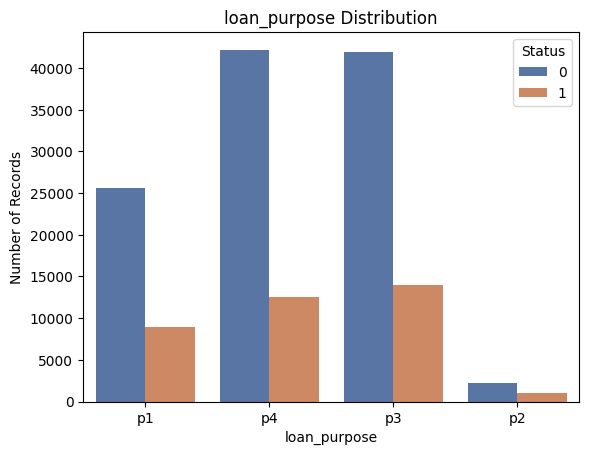

In [ ]:
# Analysis of loan_purpose
column_name = 'loan_purpose'
target_column = 'Status'
get_column_details(data,column_name)
#Plot Graph
plot_countplot(data,column_name,target_column)

In [ ]:
loan_purpose_status_1_pct = (
    data[data['Status'] == 1]
    .groupby('loan_purpose')['loan_purpose']
    .count()
    .div(data.groupby('loan_purpose')['loan_purpose'].count())
    .mul(100)
    .sort_values(ascending=False)
)
loan_purpose_status_1_pct

loan_purpose
p2    33.078803
p1    25.876799
p3    25.022348
p4    22.974872
Name: loan_purpose, dtype: float64

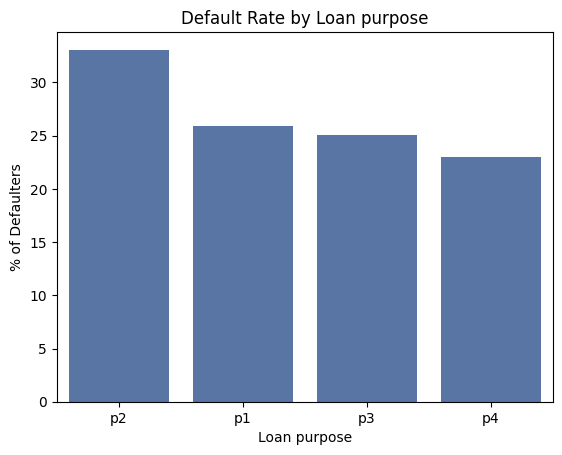

In [ ]:
sns.barplot(x=loan_purpose_status_1_pct.index, y=loan_purpose_status_1_pct)
plt.xlabel('Loan purpose')
plt.ylabel('% of Defaulters')
plt.title('Default Rate by Loan purpose')
plt.show()


In [ ]:
test_hypothysis('loan_purpose')

Chi-square statistic: 240.21381947971778
P-value: 8.555939611317916e-52
There is a relation between loan_purpose and default rate


### Observation:  

So People who taken loan for p2 has higher default rate and people has taken loan for p4 are safer comparatively.

Details of business_or_commercial column

DataType:  object

There are no null values

Number of Unique Values:  2

Distribution of column:

nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64

-----------------------------------------------------

business_or_commercial Distribution


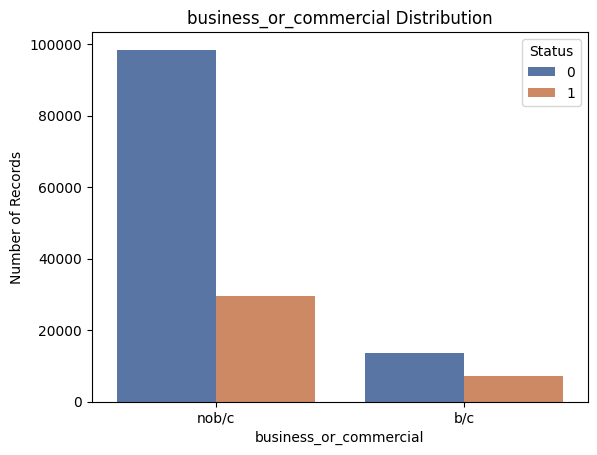

In [ ]:
# Analysis of business_or_commercial
column_name = 'business_or_commercial'
target_column = 'Status'
get_column_details(data,column_name)
#Plot Graph
plot_countplot(data,column_name,target_column)

In [ ]:
business_or_commercial_status_1_pct = (
    data[data['Status'] == 1]
    .groupby('business_or_commercial')['business_or_commercial']
    .count()
    .div(data.groupby('business_or_commercial')['business_or_commercial'].count())
    .mul(100)
    .sort_values(ascending=False)
)
business_or_commercial_status_1_pct

business_or_commercial
b/c      34.543878
nob/c    23.037652
Name: business_or_commercial, dtype: float64

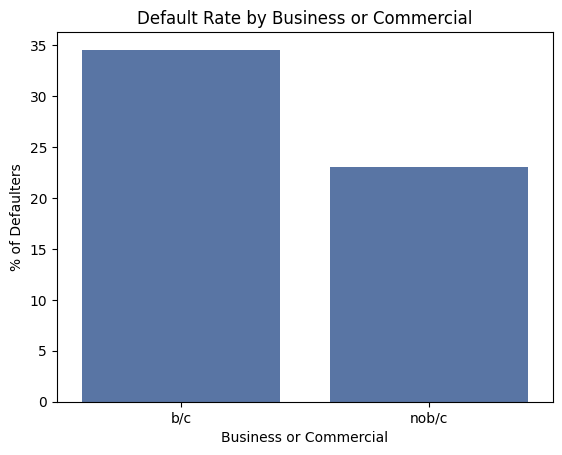

In [ ]:
sns.barplot(x=business_or_commercial_status_1_pct.index, y=business_or_commercial_status_1_pct)
plt.xlabel('Business or Commercial')
plt.ylabel('% of Defaulters')
plt.title('Default Rate by Business or Commercial')
plt.show()


In [ ]:
test_hypothysis('business_or_commercial')

Chi-square statistic: 1272.8079977681857
P-value: 9.172191110452255e-279
There is a relation between business_or_commercial and default rate


### Observation:  

So business loan has higher default rate.

Details of occupancy_type column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

pr    138201
ir      7340
sr      3129
Name: occupancy_type, dtype: int64

-----------------------------------------------------

occupancy_type Distribution


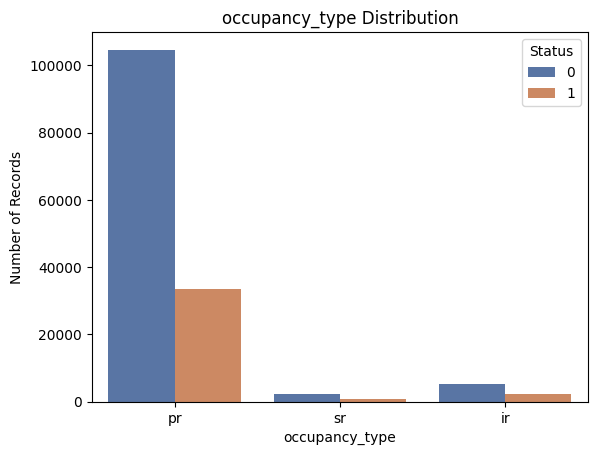

In [ ]:
# Analysis of occupancy_type
column_name = 'occupancy_type'
target_column = 'Status'
get_column_details(data,column_name)
#Plot Graph
plot_countplot(data,column_name,target_column)

In [ ]:
occupancy_type_status_1_pct = (
    data[data['Status'] == 1]
    .groupby('occupancy_type')['occupancy_type']
    .count()
    .div(data.groupby('occupancy_type')['occupancy_type'].count())
    .mul(100)
    .sort_values(ascending=False)
)
occupancy_type_status_1_pct

occupancy_type
ir    29.986376
sr    27.133269
pr    24.304455
Name: occupancy_type, dtype: float64

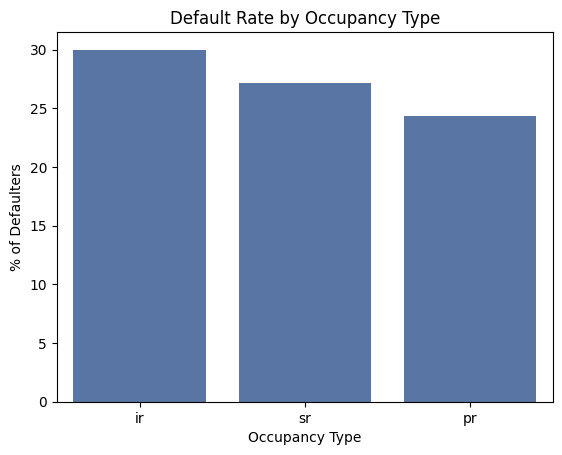

In [ ]:
sns.barplot(x=occupancy_type_status_1_pct.index, y=occupancy_type_status_1_pct)
plt.xlabel('Occupancy Type')
plt.ylabel('% of Defaulters')
plt.title('Default Rate by Occupancy Type')
plt.show()


In [ ]:
test_hypothysis('occupancy_type')

Chi-square statistic: 131.82535899539891
P-value: 2.368574267249222e-29
There is a relation between occupancy_type and default rate


### Observation:  

So ir occupancy type has higher default rate.

Details of credit_type column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: credit_type, dtype: int64

-----------------------------------------------------

credit_type Distribution


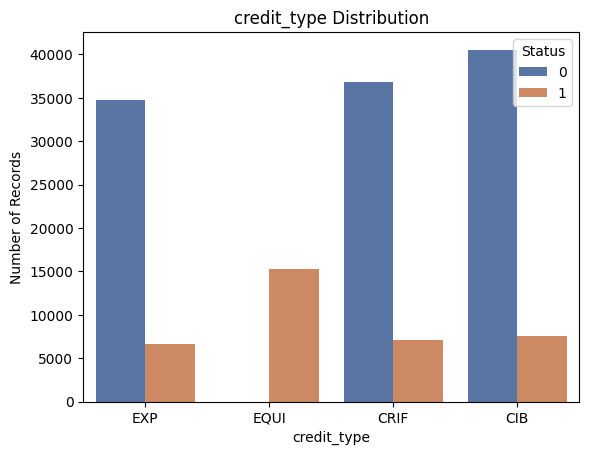

In [ ]:
 # Analysis of credit_type
column_name = 'credit_type'
target_column = 'Status'
get_column_details(data,column_name)
#Plot Graph
plot_countplot(data,column_name,target_column)

In [ ]:
credit_type_status_1_pct = (
    data[data['Status'] == 1]
    .groupby('credit_type')['credit_type']
    .count()
    .div(data.groupby('credit_type')['credit_type'].count())
    .mul(100)
    .sort_values(ascending=False)
)
credit_type_status_1_pct

credit_type
EQUI    99.993463
CRIF    16.234254
EXP     15.985382
CIB     15.804120
Name: credit_type, dtype: float64

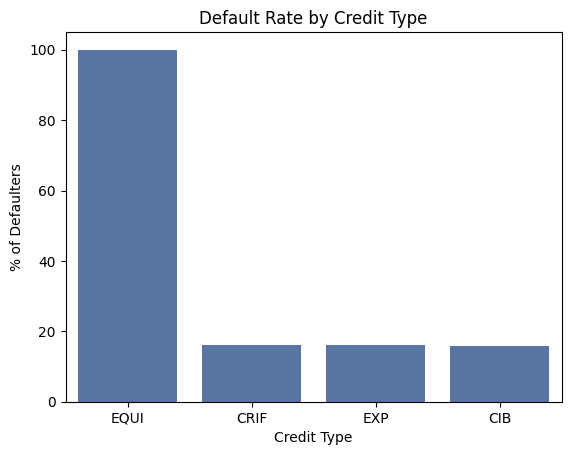

In [ ]:
sns.barplot(x=credit_type_status_1_pct.index, y=credit_type_status_1_pct)
plt.xlabel('Credit Type')
plt.ylabel('% of Defaulters')
plt.title('Default Rate by Credit Type')
plt.show()


In [ ]:
test_hypothysis('credit_type')

Chi-square statistic: 52135.280704971796
P-value: 0.0
There is a relation between credit_type and default rate


Observation:   
For credit type **EQUI** default rate is much higher

Details of co-applicant_credit_type column

DataType:  object

There are no null values

Number of Unique Values:  2

Distribution of column:

CIB    74392
EXP    74278
Name: co-applicant_credit_type, dtype: int64

-----------------------------------------------------

co-applicant_credit_type Distribution


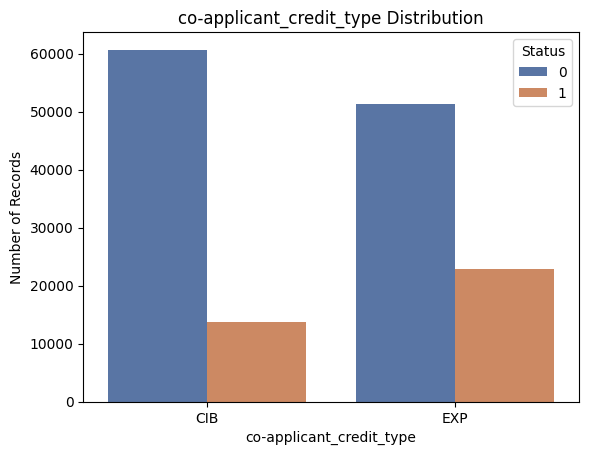

In [ ]:
# Analysis of co-applicant_credit_type
column_name = 'co-applicant_credit_type'
target_column = 'Status'
get_column_details(data,column_name)
#Plot Graph
plot_countplot(data,column_name,target_column)

In [ ]:
co_applicant_credit_type_status_1_pct = (
    data[data['Status'] == 1]
    .groupby('co-applicant_credit_type')['co-applicant_credit_type']
    .count()
    .div(data.groupby('co-applicant_credit_type')['co-applicant_credit_type'].count())
    .mul(100)
    .sort_values(ascending=False)
)
co_applicant_credit_type_status_1_pct

co-applicant_credit_type
EXP    30.865128
CIB    18.433434
Name: co-applicant_credit_type, dtype: float64

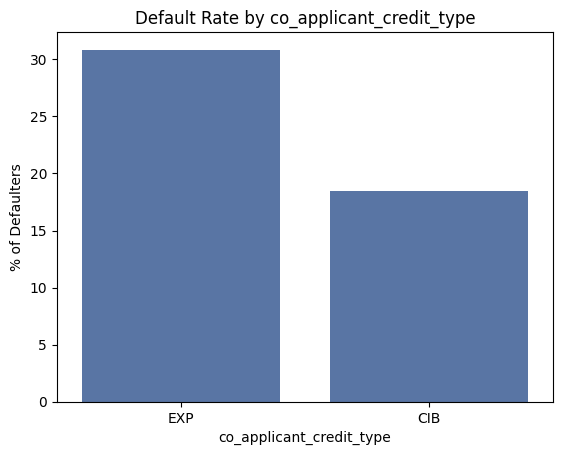

In [ ]:
sns.barplot(x=co_applicant_credit_type_status_1_pct.index, y=co_applicant_credit_type_status_1_pct)
plt.xlabel('co_applicant_credit_type')
plt.ylabel('% of Defaulters')
plt.title('Default Rate by co_applicant_credit_type')
plt.show()


In [ ]:
test_hypothysis('co-applicant_credit_type')

Chi-square statistic: 3092.3925712326145
P-value: 0.0
There is a relation between co-applicant_credit_type and default rate


### Observation:  

So co-applicant_credit_type EXP has higher default rate.

Details of Region column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

North         74722
south         64016
central        8697
North-East     1235
Name: Region, dtype: int64

-----------------------------------------------------

Region Distribution


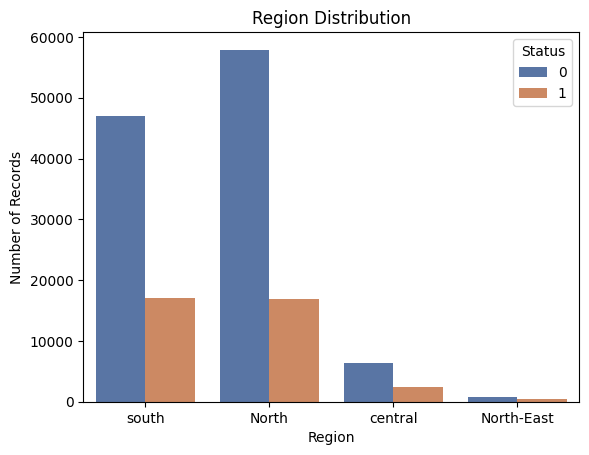

In [ ]:
# Analysis of Region
column_name = 'Region'
target_column = 'Status'
get_column_details(data,column_name)
#Plot Graph
plot_countplot(data,column_name,target_column)

In [ ]:
Region_status_1_pct = (
    data[data['Status'] == 1]
    .groupby('Region')['Region']
    .count()
    .div(data.groupby('Region')['Region'].count())
    .mul(100)
    .sort_values(ascending=False)
)
Region_status_1_pct

Region
North-East    30.445344
central       27.538232
south         26.629280
North         22.511442
Name: Region, dtype: float64

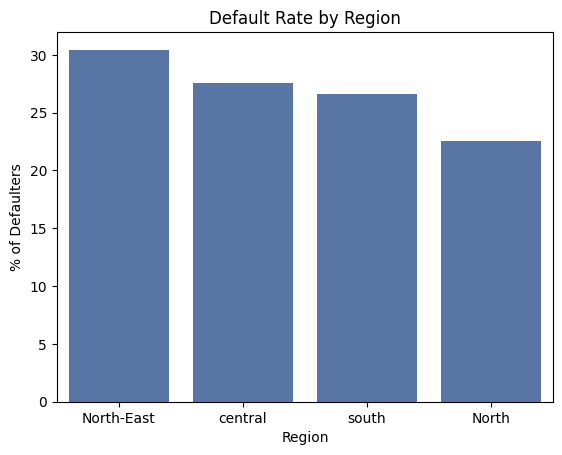

In [ ]:
sns.barplot(x=Region_status_1_pct.index, y=Region_status_1_pct)
plt.xlabel('Region')
plt.ylabel('% of Defaulters')
plt.title('Default Rate by Region')
plt.show()


In [ ]:
test_hypothysis('Region')

Chi-square statistic: 380.45633008939643
P-value: 3.7860568405811336e-82
There is a relation between Region and default rate


### Observation:  

So north east region has higher default rate.

In [ ]:
# Analysis of income
get_column_details(data,'income')

Details of income column

DataType:  float64

There are  9150  null values

Number of Unique Values:  1001

Distribution of column:

0.0         1260
3600.0      1250
4200.0      1243
4800.0      1191
3120.0      1168
            ... 
45300.0        1
154440.0       1
137760.0       1
145560.0       1
79920.0        1
Name: income, Length: 1001, dtype: int64



-----------------------------------------------------

Cleaning steps 

Datatype of income is changed to float

No. of Null values after Cleaning: 200

After Cleaning Min, Max Values:
min        0.0
max    14940.0
Name: income, dtype: float64

No. of Unique values after Cleaning: 257

-----------------------------------------------------

income Distribution


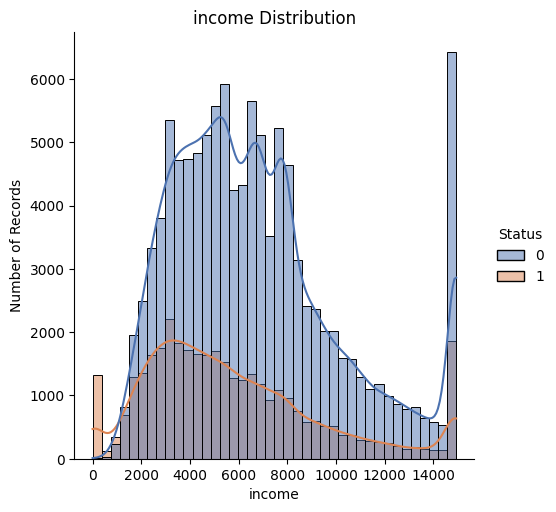

In [ ]:
column_name = 'income'
group_by = 'age'
target_column = 'Status'

#Cleaning
clean_numerical_field(data,group_by,column_name,datatype='float')
handle_outliers_IQR(data, column_name)
#Plot Graph
plot_displot(data,column_name,target_column,bins=40)

In [ ]:
# Drop the rest of null columns
data.dropna(inplace=True)

In [ ]:
data

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,4.113557,3497.599524,118000.000000,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,3.968137,1906.411653,303862.349055,pr,4980.0,EQUI,552,EXP,55-64,86.512606,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.560000,595.000000,508000.000000,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.250000,3497.599524,658000.000000,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.000000,0.000000,758000.000000,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,type1,p3,nob/c,436500,3.125000,7848.737500,608000.000000,pr,7860.0,CIB,659,EXP,55-64,71.792763,south,0
148666,173556,2019,cf,Male,type1,p1,nob/c,586500,5.190000,0.000000,788000.000000,ir,7140.0,CIB,569,CIB,25-34,74.428934,south,0
148667,173557,2019,cf,Male,type1,p4,nob/c,446500,3.125000,1226.640000,728000.000000,pr,6900.0,CIB,702,EXP,45-54,61.332418,North,0
148668,173558,2019,cf,Female,type1,p4,nob/c,196500,3.500000,4323.330000,278000.000000,pr,7140.0,EXP,737,EXP,55-64,70.683453,North,0


In [ ]:
data.isna().sum()

ID                          0
year                        0
loan_limit                  0
Gender                      0
loan_type                   0
loan_purpose                0
business_or_commercial      0
loan_amount                 0
rate_of_interest            0
Upfront_charges             0
property_value              0
occupancy_type              0
income                      0
credit_type                 0
Credit_Score                0
co-applicant_credit_type    0
age                         0
LTV                         0
Region                      0
Status                      0
dtype: int64

In [ ]:
# hypothysis test
test_hypothysis_ttest('income')

mean of income values: 
Status
0    6772.814396
1    5760.977075
Name: income, dtype: float64 for each status
T-statistic: -47.729362176696064
p-value: 0.0
There is a relation between income and default rate


Details of age column

DataType:  object

There are no null values

Number of Unique Values:  7

Distribution of column:

45-54    34699
35-44    32788
55-64    32516
65-74    20733
25-34    19100
>74       7173
<25       1335
Name: age, dtype: int64

-----------------------------------------------------

age Distribution


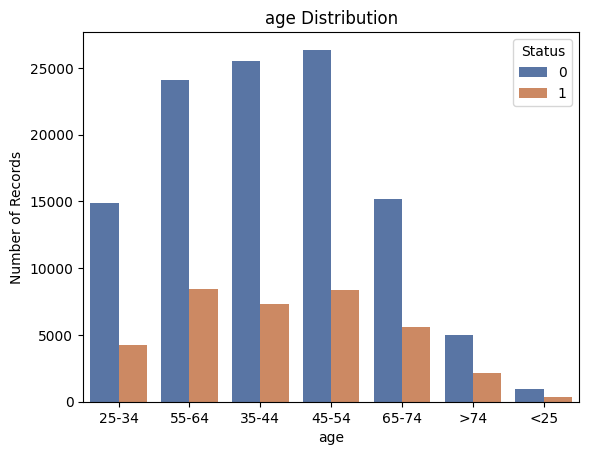

In [ ]:
# Analysis of age
column_name = 'age'
target_column = 'Status'
get_column_details(data,column_name)
#Plot Graph
plot_countplot(data,column_name,target_column)

In [ ]:
age_status_1_pct = (
    data[data['Status'] == 1]
    .groupby('age')['age']
    .count()
    .div(data.groupby('age')['age'].count())
    .mul(100)
    .sort_values(ascending=False)
)
age_status_1_pct

age
>74      30.015335
<25      28.988764
65-74    26.841268
55-64    25.891869
45-54    24.041039
35-44    22.270343
25-34    22.219895
Name: age, dtype: float64

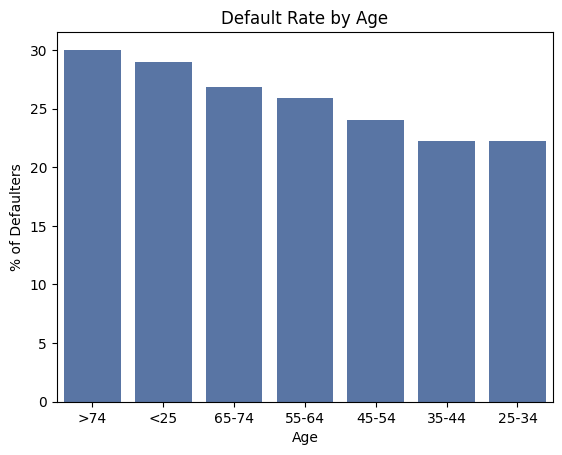

In [ ]:
sns.barplot(x=age_status_1_pct.index, y=age_status_1_pct)
plt.xlabel('Age')
plt.ylabel('% of Defaulters')
plt.title('Default Rate by Age')
plt.show()


In [ ]:
test_hypothysis('age')

Chi-square statistic: 373.1140453014347
P-value: 1.6771175838380468e-77
There is a relation between age and default rate


### Observation:  

So people more than 75 year or less than 25 year has higher default rate.

## Relation between rate_of_interest vs other categorical column

In [ ]:
import pandas as pd
from scipy import stats

def test_hypothesis_ttest_with_rate_of_interest(data, column):
    # Assuming column is the name of the column in your DataFrame
    unique_values = data[column].unique()

    # Create an empty DataFrame to store group means
    group_means_df = pd.DataFrame(columns=['Value', 'Mean'])

    # Populate the DataFrame with rate_of_interest means for each unique value in 'column'
    groups = []
    for value in unique_values:
        group_data = data[data[column] == value]['rate_of_interest']
        groups.append(group_data)

        # Calculate the mean for each group and store in the DataFrame
        mean_value = group_data.mean()
        group_means_df = pd.concat([group_means_df, pd.DataFrame({'Value': [value], 'Mean': [mean_value]})], ignore_index=False)
    group_means_df.sort_values(by='Mean', inplace=True)
    print(f"Mean of rate_of_interest values:\n{group_means_df} for each {column}")

    # Perform ANOVA test
    f_statistic, p_value = stats.f_oneway(*groups)

    # Print the results
    print('F-statistic:', f_statistic)
    print('p-value:', p_value)

    # Interpret the results
    if p_value < 0.05:
        print(f'There is a relation between {column} and rate_of_interest')
    else:
        print(f"There is no relation between {column} and rate_of_interest")


In [ ]:
test_hypothesis_ttest_with_rate_of_interest(data, 'loan_limit')

Mean of rate_of_interest values:
  Value      Mean
0    cf  4.039366
0   ncf  4.081760 for each loan_limit
F-statistic: 67.50250262266597
p-value: 2.1208932835694543e-16
There is a relation between loan_limit and rate_of_interest


In [ ]:
test_hypothesis_ttest_with_rate_of_interest(data, 'Gender')

Mean of rate_of_interest values:
               Value      Mean
0              Joint  4.007428
0               Male  4.033686
0  Sex Not Available  4.048788
0             Female  4.098973 for each Gender
F-statistic: 195.5857155897569
p-value: 1.3325519492436542e-126
There is a relation between Gender and rate_of_interest


In [ ]:
test_hypothesis_ttest_with_rate_of_interest(data, 'loan_purpose')

Mean of rate_of_interest values:
  Value      Mean
0    p4  3.862516
0    p3  4.134804
0    p1  4.144258
0    p2  4.393010 for each loan_purpose
F-statistic: 4485.956697266634
p-value: 0.0
There is a relation between loan_purpose and rate_of_interest


In [ ]:
test_hypothesis_ttest_with_rate_of_interest(data, 'occupancy_type')

Mean of rate_of_interest values:
  Value      Mean
0    pr  4.015350
0    sr  4.130715
0    ir  4.508832 for each occupancy_type
F-statistic: 3703.622158208176
p-value: 0.0
There is a relation between occupancy_type and rate_of_interest


In [ ]:
test_hypothesis_ttest_with_rate_of_interest(data, 'credit_type')

Mean of rate_of_interest values:
  Value      Mean
0   EXP  4.022017
0  EQUI  4.032251
0   CIB  4.052590
0  CRIF  4.053105 for each credit_type
F-statistic: 39.29456146386163
p-value: 2.255194021025434e-25
There is a relation between credit_type and rate_of_interest


In [ ]:
test_hypothesis_ttest_with_rate_of_interest(data, 'age')

Mean of rate_of_interest values:
   Value      Mean
0  25-34  4.023610
0  35-44  4.024590
0    >74  4.036702
0  65-74  4.041788
0  45-54  4.045315
0  55-64  4.065509
0    <25  4.124196 for each age
F-statistic: 30.09001597236395
p-value: 2.7459582693061783e-36
There is a relation between age and rate_of_interest


In [ ]:
test_hypothesis_ttest_with_rate_of_interest(data, 'Region')

Mean of rate_of_interest values:
        Value      Mean
0       south  4.035416
0     central  4.045744
0       North  4.047420
0  North-East  4.048152 for each Region
F-statistic: 7.002910985248018
p-value: 0.00010490851202778758
There is a relation between Region and rate_of_interest


In [ ]:
test_hypothesis_ttest_with_rate_of_interest(data, 'loan_type')

Mean of rate_of_interest values:
   Value      Mean
0  type3  3.602627
0  type2  3.965681
0  type1  4.113327 for each loan_type
F-statistic: 8038.494755393301
p-value: 0.0
There is a relation between loan_type and rate_of_interest


In [ ]:
test_hypothesis_ttest_with_rate_of_interest(data, 'business_or_commercial')

Mean of rate_of_interest values:
   Value      Mean
0    b/c  3.965681
0  nob/c  4.054487 for each business_or_commercial
F-statistic: 575.567002705752
p-value: 6.039981918488596e-127
There is a relation between business_or_commercial and rate_of_interest


In [ ]:
test_hypothesis_ttest_with_rate_of_interest(data, 'co-applicant_credit_type')

Mean of rate_of_interest values:
  Value      Mean
0   EXP  4.022299
0   CIB  4.061946 for each co-applicant_credit_type
F-statistic: 239.4778461808519
p-value: 5.634278748546132e-54
There is a relation between co-applicant_credit_type and rate_of_interest


### Observation or recomandation to the business
1. Loan type2 has lower rate of interest inspite having a riskier loan type
2. Business or commercial  has lower rate of interest inspite having a higher rate of default
3. co-applicant_credit_type EXP has lower rate of interest inspite having a riskier credit type.

## Analysis of other derived features

In [ ]:
data['loan_to_asset_ratio'] = data['loan_amount'] / data['property_value']
data['income_to_loan_ratio'] =  data['income'] / data['loan_amount']
data[['loan_to_asset_ratio','property_value','income_to_loan_ratio','income','loan_amount','Status']][data['Status']==1]

,loan_to_asset_ratio,property_value,income_to_loan_ratio,income,loan_amount,Status
0,0.987288,118000.000000,0.014936,1740.000000,116500,1
1,0.679584,303862.349055,0.024116,4980.000000,206500,1
10,0.812500,168000.000000,0.029451,4020.000000,136500,1
12,0.800388,258000.000000,0.018305,3780.000000,206500,1
15,0.554348,138000.000000,0.029020,2220.000000,76500,1
...,...,...,...,...,...,...
148651,0.878937,508000.000000,0.027548,12300.000000,446500,1
148652,0.177343,544143.556600,0.056580,5460.000000,96500,1
148658,0.710291,544143.556600,0.012109,4680.000000,386500,1
148661,0.967877,358000.000000,0.018934,6560.714086,346500,1


In [ ]:
data[['loan_to_asset_ratio','property_value','income_to_loan_ratio','income','loan_amount','Status']][data['Status']==0]

,loan_to_asset_ratio,property_value,income_to_loan_ratio,income,loan_amount,Status
2,0.800197,508000.0,0.023321,9480.0,406500,0
3,0.693769,658000.0,0.026024,11880.0,456500,0
4,0.918865,758000.0,0.014989,10440.0,696500,0
5,0.700893,1008000.0,0.014268,10080.0,706500,0
6,0.791096,438000.0,0.014545,5040.0,346500,0
...,...,...,...,...,...,...
148665,0.717928,608000.0,0.018007,7860.0,436500,0
148666,0.744289,788000.0,0.012174,7140.0,586500,0
148667,0.613324,728000.0,0.015454,6900.0,446500,0
148668,0.706835,278000.0,0.036336,7140.0,196500,0


In [ ]:
# loan to asset ratio
get_column_details(data,'loan_to_asset_ratio')

Details of loan_to_asset_ratio column

DataType:  float64

There are no null values

Number of Unique Values:  4831

Distribution of column:

0.749294    1446
0.683443     586
0.812500     526
0.916667     494
0.800388     379
            ... 
0.254849       1
0.937802       1
0.469032       1
0.829641       1
1.518145       1
Name: loan_to_asset_ratio, Length: 4831, dtype: int64



-----------------------------------------------------

loan_to_asset_ratio Distribution


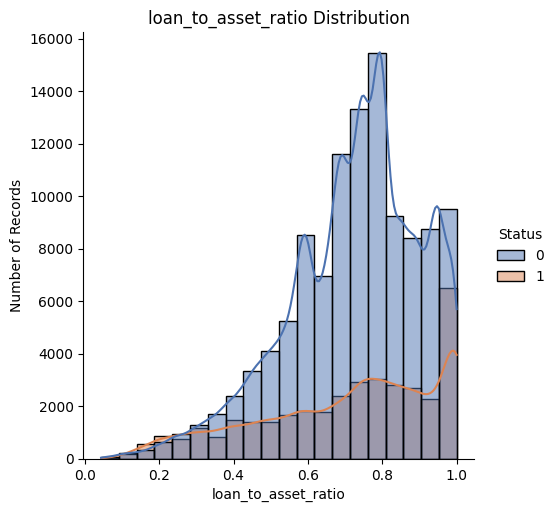

In [ ]:
column_name = 'loan_to_asset_ratio'
target_column = 'Status'

data['loan_to_asset_ratio'] = np.where(data['loan_to_asset_ratio'] > 1, 1, data['loan_to_asset_ratio'])
#Plot Graph
plot_displot(data,column_name,target_column,bins=20)

In [ ]:
# hypothysis test
test_hypothysis_ttest('loan_to_asset_ratio')

mean of loan_to_asset_ratio values: 
Status
0    0.723393
1    0.702933
Name: loan_to_asset_ratio, dtype: float64 for each status
T-statistic: -17.5346840859669
p-value: 9.140660819242202e-69
There is a relation between loan_to_asset_ratio and default rate


In [ ]:
# income to loan ratio
get_column_details(data,'income_to_loan_ratio')

Details of income_to_loan_ratio column

DataType:  float64

There are no null values

Number of Unique Values:  13821

Distribution of column:

0.000000    1260
0.018757    1041
0.030709     450
0.020564     348
0.032727     221
            ... 
0.006893       1
0.006887       1
0.023135       1
0.010533       1
0.020882       1
Name: income_to_loan_ratio, Length: 13821, dtype: int64



After Cleaning Min, Max Values:
min    0.000000
max    0.044565
Name: income_to_loan_ratio, dtype: float64

No. of Unique values after Cleaning: 11669

-----------------------------------------------------

income_to_loan_ratio Distribution


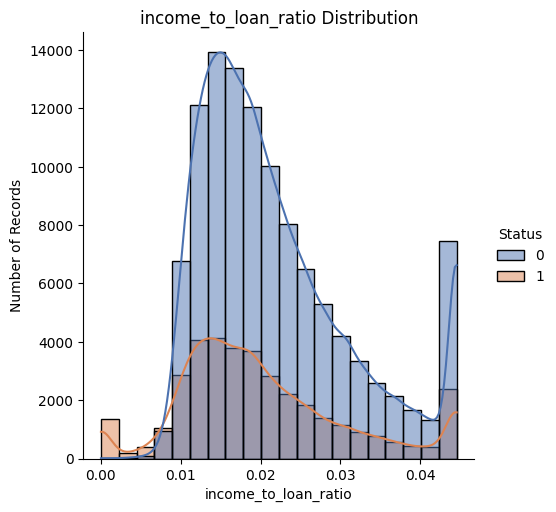

In [ ]:
column_name = 'income_to_loan_ratio'
target_column = 'Status'


#Plot Graph
handle_outliers_IQR(data, 'income_to_loan_ratio')
plot_displot(data,column_name,target_column,bins=20)

In [ ]:
# hypothysis test
test_hypothysis_ttest('income_to_loan_ratio')

mean of income_to_loan_ratio values: 
Status
0    0.021858
1    0.020076
Name: income_to_loan_ratio, dtype: float64 for each status
T-statistic: -30.2475060759298
p-value: 2.2999995001782365e-200
There is a relation between income_to_loan_ratio and default rate


## Observations  

1. People with high loan_to_asset_ratio tend to less default on loans
2. People with high income_to_loan_ratio tend to less default on loans

## Insights:
1. Loans with no fixed limit has higher default rate
2. People who does not specify gendar has a higher tendency to default on loans. Whereas joint account holders are less likely to default.
3. Type2 loan has higher default rate whereas type1 has significantly lower default rate.
4. People who taken loan for p2 has higher default rate and people who has taken loan for p4 are safer comparatively.
5. Business loan has higher default rate.
6. People with occupancy type ir has higher default rate.
7. For credit type EQUI default rate is much higher
8. co-applicant_credit_type EXP has higher default rate.
9. north east region has higher default rate.
10. people more than 75 year or less than 25 year has higher default rate.
11. Loan ammount of default loans are slightly less than loan ammount of settled loan. Probably that is good business decision to lend less to risky customer.
12. Loans with high Upfront charges has higher default rate
13. Loans with lower property value has higher default rate
14. Loans with High LTV has higher default rate
15. People with high loan_to_asset_ratio tend to less default on loans
16. People with high income_to_loan_ratio tend to less default on loans
17. Loans lower interst rate has higher default rate. This might be because bad risk management decisions to lend risky customers with lower interest rate.

Recomandation to the business
1. Loan type2 has lower rate of interest inspite having a riskier loan type. Charge a higher interest rate from them
2. Business or commercial has lower rate of interest inspite having a higher rate of default. Charge a higher interest rate from them
3. co-applicant_credit_type EXP has lower rate of interest inspite having a riskier credit type. Charge a higher interest rate from them